In [9]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load and Clean the Data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
    else:
        text = ''
    return text

# Load the dataset
df = pd.read_csv('Twitter_Data.csv')

In [ ]:
# Handle missing values
df['clean_text'].fillna('', inplace=True)
df['category'].fillna('unknown', inplace=True)

# Clean the text data
df['clean_text'] = df['clean_text'].apply(clean_text)

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['category'].astype(str)

In [ ]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7430894308943089
Confusion Matrix:
[[ 3061   546  3623]
 [   75  7445  3441]
 [  197   492 13715]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.42      0.58      7230
           0       0.88      0.68      0.77     10961
           1       0.66      0.95      0.78     14404

    accuracy                           0.74     32595
   macro avg       0.82      0.68      0.71     32595
weighted avg       0.79      0.74      0.73     32595



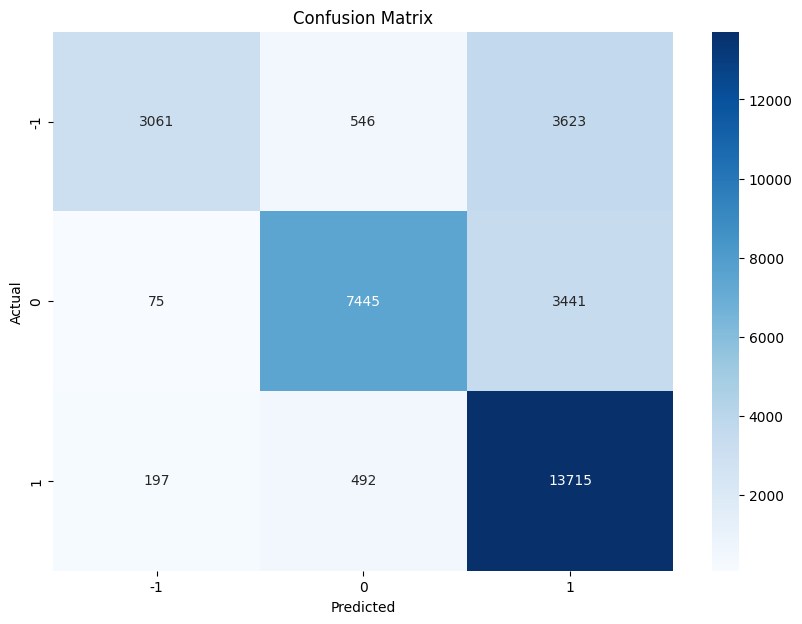

                                               clean_text actual predicted
161513                      cant like modi next work yogi      0         0
95056   1st about bjp family ignored instructions maki...      0         1
5215    ahead committed earlier fulfill lier like not ...      0         0
33604   advise all break can economist economy for fre...      1         1
155300  bhi bjps campaign chowkidar delhi from main mi...      1         1
75876   another before complete continue decided elect...      1         1
84399                     forcing his indians modi slaves      0         1
90820   allegedly before came code conduct effect elec...     -1         0
126263  back biryani brother but didnt dont eat extend...      1         1
81243   accounts admit banks business dhan express fil...     -1         1


In [ ]:
# Data Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

clean_texts = [' '.join(vectorizer.inverse_transform([x])[0]) for x in X_test]
df_test = pd.DataFrame({'clean_text': clean_texts, 'actual': y_test, 'predicted': y_pred})
print(df_test.head(10))